In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


Load and Explore the Dataset


In [7]:
# Load the dataset
df = pd.read_csv('/content/penguins_size.csv')  # Change the path if needed

# Basic exploration
print(df.head())
print(df.info())
print(df.describe())


  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null 

Data Cleaning and Preprocessing

In [8]:
# Drop rows with missing values
df_clean = df.dropna()

# Split features and target
X = df_clean.drop('species', axis=1)
y = df_clean['species']

# Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Data Cleaning and Preprocessing

In [9]:
# Define model and K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeClassifier(max_depth=3, random_state=42)

accuracies = []
fold = 1

# Train and evaluate model on each fold
for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

    print(f"\nFold {fold} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=target_encoder.classes_))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, preds))
    fold += 1

print(f"\nMean Accuracy: {np.mean(accuracies):.4f}")



Fold 1 Accuracy: 0.9851
              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        31
   Chinstrap       1.00      0.92      0.96        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67

Confusion Matrix:
[[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]

Fold 2 Accuracy: 0.9552
              precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97        34
   Chinstrap       0.92      0.86      0.89        14
      Gentoo       1.00      0.95      0.97        19

    accuracy                           0.96        67
   macro avg       0.96      0.93      0.94        67
weighted avg       0.96      0.96      0.95        67

Confusion Matrix:
[[34  0  0]
 [ 2 12  0]
 [ 0  1 18]]

Fold 3 Accuracy: 0.9701
              precision    recall  f1-score   support

K-Fold Cross Validation with Decision Tree


In [10]:
# Define model and K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeClassifier(max_depth=3, random_state=42)

accuracies = []
fold = 1

# Train and evaluate model on each fold
for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

    print(f"\nFold {fold} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=target_encoder.classes_))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, preds))
    fold += 1

print(f"\nMean Accuracy: {np.mean(accuracies):.4f}")



Fold 1 Accuracy: 0.9851
              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        31
   Chinstrap       1.00      0.92      0.96        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67

Confusion Matrix:
[[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]

Fold 2 Accuracy: 0.9552
              precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97        34
   Chinstrap       0.92      0.86      0.89        14
      Gentoo       1.00      0.95      0.97        19

    accuracy                           0.96        67
   macro avg       0.96      0.93      0.94        67
weighted avg       0.96      0.96      0.95        67

Confusion Matrix:
[[34  0  0]
 [ 2 12  0]
 [ 0  1 18]]

Fold 3 Accuracy: 0.9701
              precision    recall  f1-score   support

Plot accuracy across folds

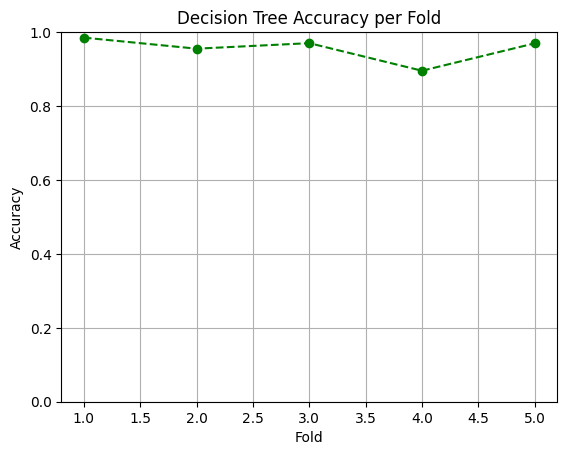

In [11]:
# Plot accuracy across folds
plt.plot(range(1, 6), accuracies, marker='o', linestyle='--', color='green')
plt.title("Decision Tree Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid()
plt.show()


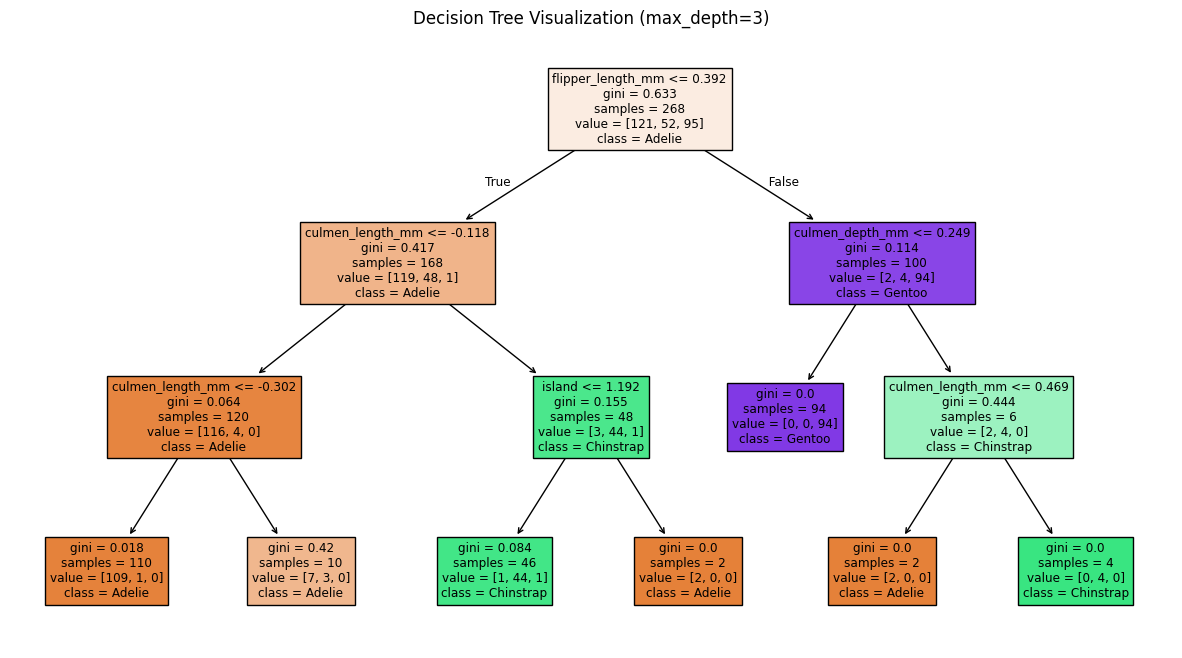

In [12]:
# Plot the decision tree structure
plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=X.columns, class_names=target_encoder.classes_, filled=True)
plt.title("Decision Tree Visualization (max_depth=3)")
plt.show()


In [13]:
# Train model on full dataset for final evaluation
model_final = DecisionTreeClassifier(max_depth=3, random_state=42)
model_final.fit(X_scaled, y_encoded)
final_preds = model_final.predict(X_scaled)

print("\nFinal Classification Report (on full data):")
print(classification_report(y_encoded, final_preds, target_names=target_encoder.classes_))



Final Classification Report (on full data):
              precision    recall  f1-score   support

      Adelie       0.97      0.99      0.98       146
   Chinstrap       0.95      0.93      0.94        68
      Gentoo       1.00      0.99      1.00       120

    accuracy                           0.98       334
   macro avg       0.97      0.97      0.97       334
weighted avg       0.98      0.98      0.98       334



In [14]:
# Calculate multi-class ROC AUC using One-vs-Rest strategy
y_bin = label_binarize(y_encoded, classes=np.unique(y_encoded))
final_preds_proba = model_final.predict_proba(X_scaled)

roc_auc = roc_auc_score(y_bin, final_preds_proba, average="macro", multi_class="ovr")
print(f"\nROC AUC (OvR): {roc_auc:.4f}")



ROC AUC (OvR): 0.9942
